Number of classes:  249
19920
996


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

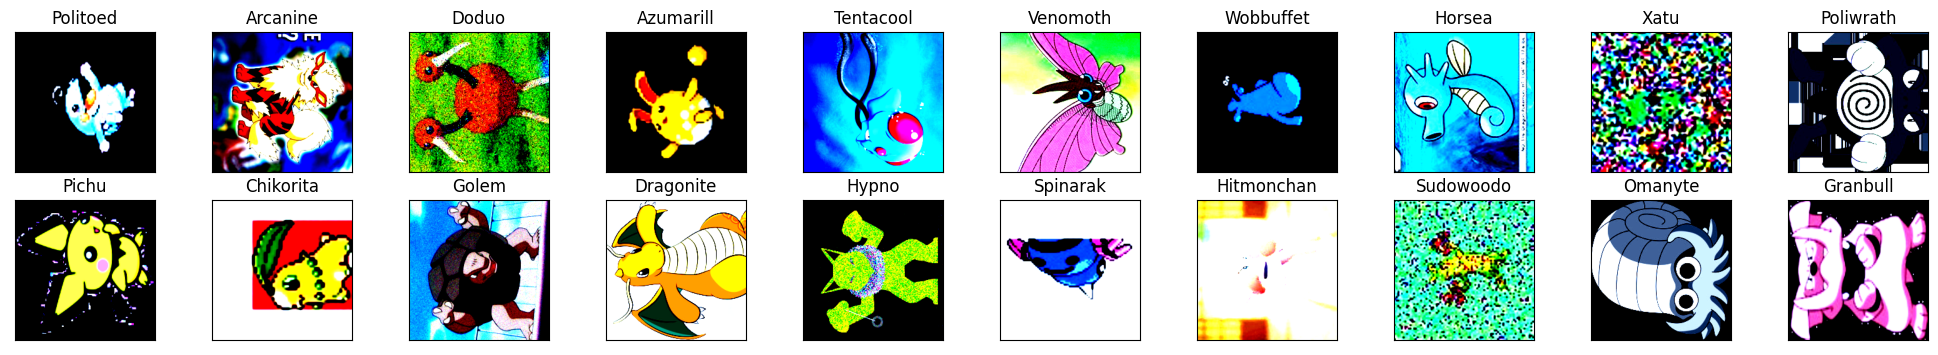

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from math import floor
import os
import torchvision.models
import time
from torchvision.models import resnet50, ResNet50_Weights

torch.manual_seed(106)
#102 is main

train_path = "DataSet/Gen2_NewAug_V3/Training"
valid_path = "DataSet/Gen2_NewAug_V3/Validation"
test_path = "DataSet/Gen2_NewAug_V3/Test"

pokemon_names = ['Abra', 'Aerodactyl', 'Aipom', 'Alakazam', 'Ampharos', 'Arbok', 'Arcanine', 'Ariados', 'Articuno', 'Azumarill', 'Bayleef', 'Beedrill', 'Bellossom', 'Bellsprout', 'Blastoise', 'Blissey', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Celebi', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Chikorita', 'Chinchou', 'Clefable', 'Clefairy', 'Cleffa', 'Cloyster', 'Corsola', 'Crobat', 'Croconaw', 'Cubone', 'Cyndaquil', 'Delibird', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Donphan', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Dunsparce', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Elekid', 'Entei', 'Espeon', 'Exeggcute', 'Exeggutor', 'Farfetch\'d', 'Fearow', 'Feraligatr', 'Flaaffy', 'Flareon', 'Forretress', 'Furret', 'Gastly', 'Gengar', 'Geodude', 'Girafarig', 'Gligar', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Granbull', 'Graveler', 'Grimer', 'Growlith', 'Gyarados', 'Haunter', 'Heracross', 'Hitmonchan', 'Hitmonlee', 'Hitmontop', 'Ho-oh', 'Hoothoot', 'Hoppip', 'Horsea', 'Houndoom', 'Houndour', 'Hypno', 'Igglybuff', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jumpluff', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingdra', 'Kingler', 'Koffing', 'Krabby', 'Lanturn', 'Lapras', 'Larvitar', 'Ledian', 'Ledyba', 'Lickitung', 'Lugia', 'Machamp', 'Machoke', 'Machop', 'Magby', 'Magcargo', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Mantine', 'Mareep', 'Marill', 'Marowak', 'Meganium', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Miltank', 'Misdreavus', 'Moltres', 'Mr. Mime', 'Muk', 'Murkrow', 'Natu', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'Noctowl', 'Octillery', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Phanpy', 'Pichu', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Piloswine', 'Pineco', 'Pinsir', 'Politoed', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Porygon2', 'Primeape', 'Psyduck', 'Pupitar', 'Quagsire', 'Quilava', 'Qwilfish', 'Raichu', 'Raikou', 'Rapidash', 'Raticate', 'Rattata', 'Remoraid', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scizor', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Sentret', 'Shellder', 'Shuckle', 'Skarmory', 'Skiploom', 'Slowbro', 'Slowking', 'Slowpoke', 'Slugma', 'Smeargle', 'Smoochum', 'Sneasel', 'Snorlax', 'Snubbull', 'Spearow', 'Spinarak', 'Squirtle', 'Stantler', 'Starmie', 'Staryu', 'Steelix', 'Sudowoodo', 'Suicune', 'Sunflora', 'Sunkern', 'Swinub', 'Tangela', 'Tauros', 'Teddiursa', 'Tentacool', 'Tentacruel', 'Togepi', 'Togetic', 'Totodile', 'Typhlosion', 'Tyranitar', 'Tyrogue', 'Umbreon', 'Unown', 'Ursaring', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Whooper', 'Wobbuffet', 'Xatu', 'Yanma', 'Zapdos', 'Zubat']
print("Number of classes: ", len(pokemon_names))

data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
                    ])

train_datasets = torchvision.datasets.ImageFolder(root= train_path, transform = data_transforms) 

valid_datasets = torchvision.datasets.ImageFolder(root= valid_path, transform = data_transforms) 

test_datasets = torchvision.datasets.ImageFolder(root= test_path, transform = data_transforms)



print(len(train_datasets))


hyperparameters = [20,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False)

print(len(train_loader))

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx]))
    ax.set_title(pokemon_names[labels[idx]])

In [2]:
model_test_path = 'DataSet/Model Test'
model_test_datasets = torchvision.datasets.ImageFolder(root=model_test_path, transform = data_transforms)
model_test_loader = torch.utils.data.DataLoader(model_test_datasets, batch_size=1, num_workers=1, shuffle=False, collate_fn=None, pin_memory=False)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pandas as pd
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

In [4]:
def graph_features(fig, classes):
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [5]:
use_cuda = True

In [6]:
#Base AlexNet
class Pokemon_Classifier_AlexNet(nn.Module):
    def __init__(self, name = "Pokemon_Classifier_AlexNet"):
          self.name = "Pokemon_Classifier_AlexNet"
          super(Pokemon_Classifier_AlexNet, self).__init__()
          self.conv1 = nn.Conv2d(256, 50, 2) #in_channels, out_chanels, kernel_size
          self.conv2 = nn.Conv2d(50, 10, 2) #in_channels, out_chanels, kernel_size
          self.fc1 = nn.Linear(10*4*4, 300)
          self.fc2 = nn.Linear(300, 149)

    def forward(self, x):
          x = F.relu(self.conv1(x))
          x = F.relu(self.conv2(x))
          x = x.view(-1, 10*4*4)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

# Train

In [7]:
def train(model, train_dataset, valid_dataset, batch_size=128, learning_rate=0.001, num_epochs=20):
    model_name = 'ResNet101_SGD'
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_acc = []
    valid_acc = []
    loss_chart = []
    epochs = []
    timelist = []

    # training

    n = 0

    for epoch in range(num_epochs):
        start_time = time.time()
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        percent = 0
        l = 0
        for imgs, labels in iter(train_loader):
            
            if l % 100 == 0:
              print("Epoch:" + str(epoch) + "   Percentage of Epoch Loaded " + str(round(percent / len(train_loader) * 100, 2)))
            if use_cuda == True:
              imgs = imgs.cuda()
              labels = labels.cuda()



            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            percent += 1
            l += 1
        n += 1

        epochs.append(n)
        timelist.append((time.time() - start_time))

        
        # track accuracy
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        loss_chart.append(float(loss)/batch_size)


        print((f"Epoch {epoch+1}: Train accuracy = {train_acc[-1]}; Validation accuracy = {valid_acc[-1]}"))
        model_path = "result/saved_torch/model_{0}_bs{1}_lr{2}_epoch{3}".format(model_name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
    epochs = np.arange(1, num_epochs + 1)



    name_param = str(model_name) + "_batch_size_" + str(batch_size) + "_learning_rate_" + str(learning_rate) + "_num_epochs_" + str(num_epochs)

    plotting(epochs,loss_chart,train_acc, valid_acc, name_param)

    # open a dataframe, save the results
    df = pd.DataFrame({'epochs': epochs, 'train_acc': train_acc, 'valid_acc': valid_acc, 'loss': loss_chart, 'time': timelist})
    df.to_csv('result/' + name_param + '.csv', index=False)
    model_path = "result/saved_torch/model_{0}_bs{1}_lr{2}_epoch{3}".format(model_name, batch_size, learning_rate, epoch)
    torch.save(model.state_dict(), model_path)

    return train_acc[-1], valid_acc[-1], epochs, timelist

In [8]:
def plotting(epochs, loss_chart, train_acc, valid_acc, name_param):
    plt.title("Training Loss Curve")
    plt.plot(epochs, loss_chart, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    loss_curve_saving_path = "result/" + name_param + "_loss_curve.png"
    plt.savefig(loss_curve_saving_path)
    plt.show()

    plt.title("Training Accuracy Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    acc_curve_saving_path = "result/" + name_param + "_acc_curve.png"
    plt.savefig(acc_curve_saving_path)
    plt.show()


In [15]:
def get_accuracy(model, test_loader):
    data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        if use_cuda == True:
          imgs = imgs.cuda()
          labels = labels.cuda()
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]

        pred_numpy = pred.cpu().numpy()
        labels_numpy = labels.cpu().numpy()
        # print(labels_numpy[0])
        
        for pred, label in zip(pred_numpy, labels_numpy):
            print("predicted pokemon:" + str(pokemon_names[pred[0]]))
            print("actual pokemon:" + str(pokemon_names[label])+ '\n')

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [9]:
# def get_accuracy(model, test_loader):
#     data = test_loader

#     correct = 0
#     total = 0
#     for imgs, labels in data:
#         if use_cuda == True:
#           imgs = imgs.cuda()
#           labels = labels.cuda()
        
#         output = model(imgs)
        
#         #select index with maximum prediction score
#         pred = output.max(1, keepdim=True)[1]
#         correct += pred.eq(labels.view_as(pred)).sum().item()
#         total += imgs.shape[0]
#     return correct / total

In [10]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 247) #(num_of_class == 2)

hyperparameters = [7,8]
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=True)

C:\Users\hdape\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hdape\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# ResNet50

C:\Users\hdape\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch:0   Percentage of Epoch Loaded 0.0
Epoch:0   Percentage of Epoch Loaded 3.51
Epoch:0   Percentage of Epoch Loaded 7.03
Epoch:0   Percentage of Epoch Loaded 10.54
Epoch:0   Percentage of Epoch Loaded 14.05
Epoch:0   Percentage of Epoch Loaded 17.57
Epoch:0   Percentage of Epoch Loaded 21.08
Epoch:0   Percentage of Epoch Loaded 24.6
Epoch:0   Percentage of Epoch Loaded 28.11
Epoch:0   Percentage of Epoch Loaded 31.62
Epoch:0   Percentage of Epoch Loaded 35.14
Epoch:0   Percentage of Epoch Loaded 38.65
Epoch:0   Percentage of Epoch Loaded 42.16
Epoch:0   Percentage of Epoch Loaded 45.68
Epoch:0   Percentage of Epoch Loaded 49.19
Epoch:0   Percentage of Epoch Loaded 52.71
Epoch:0   Percentage of Epoch Loaded 56.22
Epoch:0   Percentage of Epoch Loaded 59.73
Epoch:0   Percentage of Epoch Loaded 63.25
Epoch:0   Percentage of Epoch Loaded 66.76
Epoch:0   Percentage of Epoch Loaded 70.27
Epoch:0   Percentage of Epoch Loaded 73.79
Epoch:0   Percentage of Epoch Loaded 77.3
Epoch:0   Percent

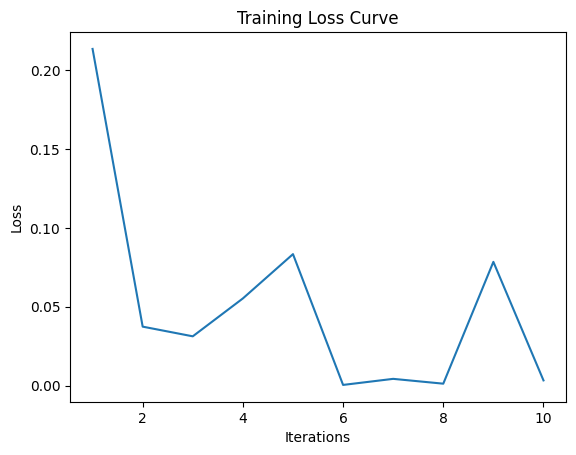

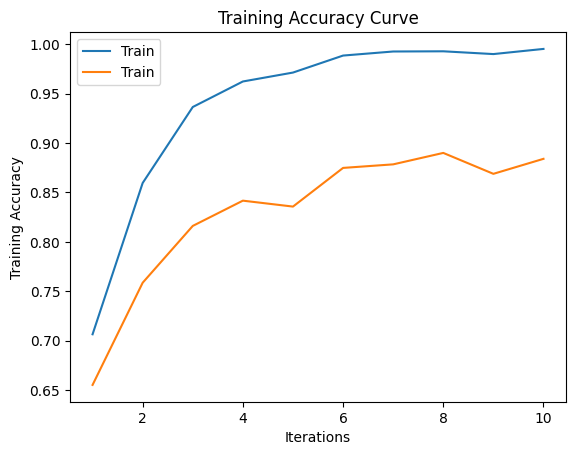

(0.9954317269076305,
 0.8840927258193445,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [130.45788192749023,
  105.31677198410034,
  106.83043217658997,
  133.71844840049744,
  145.1818768978119,
  142.68767404556274,
  147.2059555053711,
  148.12048983573914,
  149.2070333957672,
  105.11756873130798])

In [11]:
model = models.resnet101(pretrained=True)   #load resnet18 model
# for param in model.parameters():
#     param.requires_grad = False
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 


train(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.005, num_epochs=10)

In [ ]:
model = models.resnet101(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 256, learning_rate = 0.01, num_epochs=32)

In [ ]:

model = models.resnet50(pretrained=True)   #load resnet18 model
for param in model.parameters():
    param.requires_grad = False
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 32, learning_rate = 0.05, num_epochs=16)

In [ ]:

model = models.resnet50(pretrained=True)   #load resnet18 model
for param in model.parameters():
    param.requires_grad = False
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 32, learning_rate = 0.005, num_epochs=16)

In [ ]:

model = models.resnet50(pretrained=True)   #load resnet18 model
for param in model.parameters():
    param.requires_grad = False
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 32, learning_rate = 0.001, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.01, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.05, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.005, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.001, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.01, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.05, num_epochs=16)

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.005, num_epochs=16)

In [ ]:
model = models.resnet101(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.001, num_epochs=16)

# ResNet 18

In [ ]:
def train18(model, train_dataset, valid_dataset, batch_size=128, learning_rate=0.001, num_epochs=20):
    model_name = 'ResNet18_SGD'
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_acc = []
    valid_acc = []
    loss_chart = []
    epochs = []
    timelist = []

    # training

    n = 0

    for epoch in range(num_epochs):
        start_time = time.time()
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        percent = 0
        l = 0
        for imgs, labels in iter(train_loader):
            
            if l % 100 == 0:
              print("Epoch:" + str(epoch) + "   Percentage of Epoch Loaded " + str(round(percent / len(train_loader) * 100, 2)))
            if use_cuda == True:
              imgs = imgs.cuda()
              labels = labels.cuda()



            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            percent += 1
            l += 1
        n += 1

        epochs.append(n)
        timelist.append((time.time() - start_time))

        
        # track accuracy
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        loss_chart.append(float(loss)/batch_size)


        print((f"Epoch {epoch+1}: Train accuracy = {train_acc[-1]}; Validation accuracy = {valid_acc[-1]}"))
        model_path = "result/saved_torch/model_{0}_bs{1}_lr{2}_epoch{3}".format(model_name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
    epochs = np.arange(1, num_epochs + 1)



    name_param = str(model_name) + "_batch_size_" + str(batch_size) + "_learning_rate_" + str(learning_rate) + "_num_epochs_" + str(num_epochs)

    plotting(epochs,loss_chart,train_acc, valid_acc, name_param)

    # open a dataframe, save the results
    df = pd.DataFrame({'epochs': epochs, 'train_acc': train_acc, 'valid_acc': valid_acc, 'loss': loss_chart, 'time': timelist})
    df.to_csv('result/' + name_param + '.csv', index=False)
    model_path = "result/saved_torch/model_{0}_bs{1}_lr{2}_epoch{3}".format(model_name, batch_size, learning_rate, epoch)
    torch.save(model.state_dict(), model_path)

    return train_acc[-1], valid_acc[-1], epochs, timelist

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.01, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.005, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 5, learning_rate = 0.001, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.01, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.005, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 10, learning_rate = 0.001, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 8, learning_rate = 0.01, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 8, learning_rate = 0.005, num_epochs=16)

In [ ]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

train18(model, train_loader, valid_loader, batch_size = 8, learning_rate = 0.001, num_epochs=16)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in valid_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ['Abra', 'Aerodactyl', 'Aipom', 'Alakazam', 'Ampharos', 'Arbok', 'Arcanine', 'Ariados', 'Articuno', 'Azumarill', 'Bayleef', 'Beedrill', 'Bellossom', 'Bellsprout', 'Blastoise', 'Blissey', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Celebi', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Chikorita', 'Chinchou', 'Clefable', 'Clefairy', 'Cleffa', 'Cloyster', 'Corsola', 'Crobat', 'Croconaw', 'Cubone', 'Cyndaquil', 'Delibird', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Donphan', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Dunsparce', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Elekid', 'Entei', 'Espeon', 'Exeggcute', 'Exeggutor', 'Farfetch\'d', 'Fearow', 'Feraligatr', 'Flaaffy', 'Flareon', 'Forretress', 'Furret', 'Gastly', 'Gengar', 'Geodude', 'Girafarig', 'Gligar', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Granbull', 'Graveler', 'Grimer', 'Growlith', 'Gyarados', 'Haunter', 'Heracross', 'Hitmonchan', 'Hitmonlee', 'Hitmontop', 'Ho-oh', 'Hoothoot', 'Hoppip', 'Horsea', 'Houndoom', 'Houndour', 'Hypno', 'Igglybuff', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jumpluff', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingdra', 'Kingler', 'Koffing', 'Krabby', 'Lanturn', 'Lapras', 'Larvitar', 'Ledian', 'Ledyba', 'Lickitung', 'Lugia', 'Machamp', 'Machoke', 'Machop', 'Magby', 'Magcargo', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Mantine', 'Mareep', 'Marill', 'Marowak', 'Meganium', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Miltank', 'Misdreavus', 'Moltres', 'Mr. Mime', 'Muk', 'Murkrow', 'Natu', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'Noctowl', 'Octillery', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Phanpy', 'Pichu', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Piloswine', 'Pineco', 'Pinsir', 'Politoed', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Porygon2', 'Primeape', 'Psyduck', 'Pupitar', 'Quagsire', 'Quilava', 'Qwilfish', 'Raichu', 'Raikou', 'Rapidash', 'Raticate', 'Rattata', 'Remoraid', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scizor', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Sentret', 'Shellder', 'Shuckle', 'Skarmory', 'Skiploom', 'Slowbro', 'Slowking', 'Slowpoke', 'Slugma', 'Smeargle', 'Smoochum', 'Sneasel', 'Snorlax', 'Snubbull', 'Spearow', 'Spinarak', 'Squirtle', 'Stantler', 'Starmie', 'Staryu', 'Steelix', 'Sudowoodo', 'Suicune', 'Sunflora', 'Sunkern', 'Swinub', 'Tangela', 'Tauros', 'Teddiursa', 'Tentacool', 'Tentacruel', 'Togepi', 'Togetic', 'Totodile', 'Typhlosion', 'Tyranitar', 'Tyrogue', 'Umbreon', 'Unown', 'Ursaring', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Whooper', 'Wobbuffet', 'Xatu', 'Yanma', 'Zapdos', 'Zubat']

# Build confusion matrixcf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')


# Test

In [16]:
best_model_path = 'result/saved_torch/model_{0}_bs{1}_lr{2}_epoch{3}'.format('ResNet50_SGD', 32, 0.001, 15)
num_classes = 249  # specify the number of classes in your saved model
best_model = models.resnet50(pretrained=False)  # create a new model instance
best_model.fc = torch.nn.Linear(2048, num_classes)  # replace the fully connected layer
best_model.load_state_dict(torch.load(best_model_path))
best_model = best_model.cuda()  # move the model to the GPU



test_accuracy = get_accuracy(best_model, test_loader)
print('Test Accuracy: {0}'.format(test_accuracy))

C:\Users\hdape\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hdape\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


predicted pokemon:Nidoking
actual pokemon:Nidoking

predicted pokemon:Doduo
actual pokemon:Doduo

predicted pokemon:Vulpix
actual pokemon:Sandshrew

predicted pokemon:Seel
actual pokemon:Seel

predicted pokemon:Omastar
actual pokemon:Omastar

predicted pokemon:Krabby
actual pokemon:Kingler

predicted pokemon:Hitmontop
actual pokemon:Hitmontop

predicted pokemon:Dragonair
actual pokemon:Dragonair

predicted pokemon:Furret
actual pokemon:Furret

predicted pokemon:Spinarak
actual pokemon:Spinarak

predicted pokemon:Heracross
actual pokemon:Heracross

predicted pokemon:Azumarill
actual pokemon:Azumarill

predicted pokemon:Venonat
actual pokemon:Venonat

predicted pokemon:Mew
actual pokemon:Mew

predicted pokemon:Zapdos
actual pokemon:Zapdos

predicted pokemon:Typhlosion
actual pokemon:Typhlosion

predicted pokemon:Tyranitar
actual pokemon:Tyranitar

predicted pokemon:Heracross
actual pokemon:Heracross

predicted pokemon:Staryu
actual pokemon:Staryu

predicted pokemon:Seaking
actual pokemon

In [ ]:
def testImage(model, img, label):
        output = model(img)
        pred = output.max(1, keepdim=True)[1]
        print("Pokemon predicted: " + pokemon_names[pred])
        print("Actual Pokemon: "+ pokemon_names[label])

In [ ]:
for img, label in model_test_loader:
    label = 158
    img = img.cuda()
    output = best_model(img)
    testImage(best_model, img, label)